<a href="https://colab.research.google.com/github/AnVo01/AI/blob/AI/Robot_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def sind(x):
    return math.sin(math.radians(x))
 
def cosd(x):
    return math.cos(math.radians(x))

Px=[]
Py=[]
tt1=[]
tt2=[]
for i in range(0,180,1):
  for j in range(0,180,1):
    Px.append(50*cosd(i) + 40*cosd(i+j))
    Py.append(50*sind(i) + 40*sind(i+j))
    tt1.append(i)
    tt2.append(j)

data = pd.DataFrame(np.c_[tt1,tt2,Px,Py],columns=['tt1','tt2','Px','Py'])
y = data.drop(['Px','Py'],axis=1)
x = data.drop(['tt1','tt2'],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = Sequential()
model.add(Dense(1000,activation='relu',input_shape=(2,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(2))

model.compile(loss='mse',optimizer='Adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val-loss',patience=20)])

Epoch 1/100
162/162 [==============================] - 6s 32ms/step - loss: 3921.3584 - accuracy: 0.6640 - val_loss: 3302.5938 - val_accuracy: 0.6761
Epoch 2/100
162/162 [==============================] - 5s 28ms/step - loss: 989.1396 - accuracy: 0.8501 - val_loss: 120.0576 - val_accuracy: 0.9103
Epoch 3/100
162/162 [==============================] - 5s 30ms/step - loss: 77.2762 - accuracy: 0.9301 - val_loss: 49.0316 - val_accuracy: 0.9454
Epoch 4/100
162/162 [==============================] - 5s 29ms/step - loss: 48.7992 - accuracy: 0.9514 - val_loss: 33.8738 - val_accuracy: 0.9593
Epoch 5/100
162/162 [==============================] - 4s 26ms/step - loss: 34.3694 - accuracy: 0.9610 - val_loss: 34.5595 - val_accuracy: 0.9512
Epoch 6/100
162/162 [==============================] - 3s 16ms/step - loss: 27.4175 - accuracy: 0.9642 - val_loss: 33.7590 - val_accuracy: 0.9554
Epoch 7/100
162/162 [==============================] - 3s 16ms/step - loss: 23.0498 - accuracy: 0.9704 - val_loss: 14.

In [ ]:
data

,tt1,tt2,Px,Py
0,0.0,0.0,90.000000,0.000000
1,0.0,1.0,89.993908,0.698096
2,0.0,2.0,89.975633,1.395980
3,0.0,3.0,89.945181,2.093438
4,0.0,4.0,89.902562,2.790259
...,...,...,...,...
32395,179.0,175.0,-10.211509,-3.308518
32396,179.0,176.0,-10.144597,-2.613609
32397,179.0,177.0,-10.089823,-1.917639
32398,179.0,178.0,-10.047203,-1.220818


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3000      
                                                                 
 dense_1 (Dense)             (None, 512)               512512    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 516,538
Trainable params: 516,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  3.1201846599578857
độ chính xác kiểm tra là:  0.9916666746139526


In [ ]:
model.predict(x_test)

array([[ 28.921946, 128.9912  ],
       [ 61.270267, 126.67281 ],
       [159.53886 ,   8.378698],
       ...,
       [144.03711 ,   8.041315],
       [101.3754  , 101.97233 ],
       [ 10.478572,  55.96185 ]], dtype=float32)

In [ ]:
y_test

,tt1,tt2
5349,29.0,129.0
11107,61.0,127.0
28810,160.0,10.0
21198,117.0,138.0
28616,158.0,176.0
...,...,...
31874,177.0,14.0
19016,105.0,116.0
25931,144.0,11.0
18463,102.0,103.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/MyDrive/AI/Robot_2.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/Robot_2.h5')

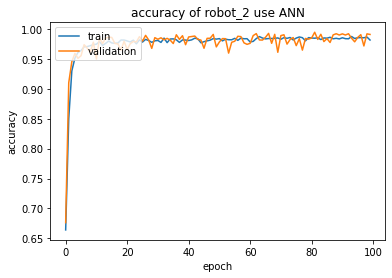

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of robot_2 use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()